In [3]:
library("foreign")

In [4]:
mytable <- read.spss("/home/raquel/myscripts/supplementary_material_HL/R21_data_Raquel_file_7_26_2018_3.sav", use.value.labels=FALSE,  to.data.frame=TRUE)

In [5]:
head(mytable)

ID,AverageDPOAE_LE,AverageDPOAE_RE,AverageY8HTL_3and4k_LE,AverageY8HTL_3and4k_RE,Gender,Ethnicity,MusicEx_total,smoking,KCNE1_1_bv,⋯,CAT_3_bv,CAT_5_bv,HSP70_1_bv,HSP70_2_bv,HSP70_3_bv,PCDH15_bv,MYH14_1_bv,MYH14_2_bv,GRM7_bv,PON2_bv
1005,25.66667,27.777778,-2.5,2.5,1,1,300.0,2,2,⋯,2,1,1,1,1,2,1,1,2,2
1010,17.77778,22.111111,12.5,7.5,1,1,400.0,2,1,⋯,1,1,2,2,1,2,1,2,1,2
1015,18.66667,7.666667,12.5,7.5,1,1,197.5,2,2,⋯,2,1,2,2,1,2,2,2,1,2
1017,14.44444,12.888889,-2.5,12.5,1,1,839.2,2,2,⋯,2,1,2,2,1,2,1,1,2,2
1018,30.11111,32.222222,5.0,-5.0,2,1,360.0,2,1,⋯,1,1,2,2,1,1,2,2,1,1
1019,19.00000,16.333333,-2.5,0.0,2,1,899.0,2,2,⋯,2,1,2,2,1,1,2,2,2,2


In [6]:
dim(mytable)


[1] 166  28

In [7]:
cbind(names(mytable), c(1:length(names(mytable))))[6:28,]

Gender,6
Ethnicity,7
MusicEx_total,8
smoking,9
KCNE1_1_bv,10
KCNE1_2_bv,11
KCNQ1_bv,12
CDH23_2_bv,13
GJB2_1_bv,14
GJB2_2_bv,15
GJB4_bv,16


In [8]:
cbind(names(mytable), c(1:length(names(mytable))))[c(2:5),]

AverageDPOAE_LE,2
AverageDPOAE_RE,3
AverageY8HTL_3and4k_LE,4
AverageY8HTL_3and4k_RE,5


In [9]:
predictors <- c(names(mytable)[6:28] )
responses <- names(mytable)[c(2:5)]
cbind(responses, c(1:length(responses)))


responses,
AverageDPOAE_LE,1
AverageDPOAE_RE,2
AverageY8HTL_3and4k_LE,3
AverageY8HTL_3and4k_RE,4


In [10]:
my_variables <- c(predictors, responses)

In [11]:
mytable_variables <- mytable[,my_variables]

In [12]:
summary(mytable[,my_variables])

     Gender        Ethnicity     MusicEx_total       smoking     
 Min.   :1.000   Min.   :1.000   Min.   :  34.0   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 267.6   1st Qu.:2.000  
 Median :1.000   Median :1.000   Median : 425.2   Median :2.000  
 Mean   :1.494   Mean   :1.084   Mean   : 593.0   Mean   :1.891  
 3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.: 771.0   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :5640.0   Max.   :2.000  
                                                  NA's   :1      
   KCNE1_1_bv      KCNE1_2_bv       KCNQ1_bv       CDH23_2_bv   
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :1.000   Median :1.000   Median :1.000   Median :1.000  
 Mean   :1.494   Mean   :1.488   Mean   :1.476   Mean   :1.446  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                 

In [13]:
library(gamlss)
library(epiDisplay)

Loading required package: splines
Loading required package: gamlss.data
Loading required package: gamlss.dist
Loading required package: MASS
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.1-0  ********** 
For more on GAMLSS look at http://www.gamlss.org/
Type gamlssNews() to see new features/changes/bug fixes.

Loading required package: survival
Loading required package: nnet

Attaching package: ‘epiDisplay’

The following object is masked from ‘package:gamlss’:

    cs



In [73]:
lr_results <- matrix(,nrow=length(predictors), ncol=length(responses))
lr_results_linear <- matrix(,nrow=length(predictors), ncol=length(responses))

dimnames(lr_results) <- list(predictors,responses)
dimnames(lr_results_linear) <- list(predictors,responses)

for(response in responses){
    
    print(paste("Running Likelihood-ratio test for ", response, sep=""))

    for(predictor in predictors){
        
        temp_table <- mytable[,c(response,predictor)]
        temp_table <- na.omit(temp_table)
        #print(temp_table)
        my_response <- temp_table[,1]
        my_predictor <- temp_table[,2]
        
        my_index <- which(responses==response)
        my_predindex <- which(predictors==predictor)
        
        if(response=="AverageDPOAE_LE" || response=="AverageDPOAE_RE"){
            my_model <- gamlss(my_response~my_predictor,family=SHASH, method=mixed(5,20))
            my_null <-  gamlss(my_response~1,family=SHASH, method=mixed(5,20))
            my_lr <- lrtest(my_model, my_null)
            lr_results[my_predindex,my_index] <- my_lr$p.value

        }
        if(response=="AverageY8HTL_3and4k_LE" || response=="AverageY8HTL_3and4k_RE"){
            
            my_model <- gamlss(my_response~my_predictor,family=ST4, method=mixed(5,20), sigma.link="identify", mu.link="identify", nu.link = "identify")
            my_null <-  gamlss(my_response~1,family=ST4, method=mixed(5,20),  sigma.link="identify", mu.link="identify", nu.link = "identify")
            my_lr <- lrtest(my_model, my_null)
            lr_results[my_predindex,my_index] <- my_lr$p.value

        }
        my_model_linear <- glm(my_response~my_predictor)
        my_null_linear <-  glm(my_response~1)
        
        my_lr_linear <- lrtest(my_model_linear, my_null_linear)
        lr_results_linear[my_predindex,my_index] <- my_lr_linear$p.value
        
        
        
    }
    
    
}

[1] "Running Likelihood-ratio test for AverageDPOAE_LE"
GAMLSS-RS iteration 1: Global Deviance = 976.4839 
GAMLSS-RS iteration 2: Global Deviance = 973.6902 
GAMLSS-RS iteration 3: Global Deviance = 972.2362 
GAMLSS-RS iteration 4: Global Deviance = 971.174 
GAMLSS-RS iteration 5: Global Deviance = 970.4363 
GAMLSS-CG iteration 1: Global Deviance = 967.3973 
GAMLSS-CG iteration 2: Global Deviance = 967.1863 
GAMLSS-CG iteration 3: Global Deviance = 967.1754 
GAMLSS-CG iteration 4: Global Deviance = 967.173 
GAMLSS-CG iteration 5: Global Deviance = 967.1712 
GAMLSS-CG iteration 6: Global Deviance = 967.1707 
GAMLSS-RS iteration 1: Global Deviance = 1005.028 
GAMLSS-RS iteration 2: Global Deviance = 1001.418 
GAMLSS-RS iteration 3: Global Deviance = 999.2452 
GAMLSS-RS iteration 4: Global Deviance = 997.4934 
GAMLSS-RS iteration 5: Global Deviance = 996.2195 
GAMLSS-CG iteration 1: Global Deviance = 990.5465 
GAMLSS-CG iteration 2: Global Deviance = 990.4336 
GAMLSS-CG iteration 3: Globa

In [15]:
round(lr_results_linear, digits=4)

,AverageDPOAE_LE,AverageDPOAE_RE,AverageY8HTL_3and4k_LE,AverageY8HTL_3and4k_RE
Gender,0.0010,0.0000,0.0062,0.0085
Ethnicity,0.0943,0.0519,0.2154,0.9657
MusicEx_total,0.1377,0.7591,0.6318,0.3811
smoking,0.8125,0.6685,0.9342,0.6919
KCNE1_1_bv,0.0265,0.5935,0.5378,0.0794
KCNE1_2_bv,0.3657,0.6526,0.5577,0.2432
KCNQ1_bv,0.6658,0.1117,0.1834,0.9989
CDH23_2_bv,0.1323,0.0458,0.4916,0.5347
GJB2_1_bv,0.5985,0.1237,0.9150,0.4706
GJB2_2_bv,0.1256,0.0290,0.5780,0.1222


In [16]:
#gamlss_lr_results <- lr_results[,c("Average_OAE_LE","Average_OAE_RE","AverageY8HTL_3and4k_LE","AverageY8HTL_3and4k_RE")]
#round(gamlss_lr_results, digits=2)

In [74]:
p_threshold <- 0.05
marginal_p_threshold <- 0.07

In [75]:
sign_count <- 0

for(i in c(1:ncol(lr_results_linear))){
    print(dimnames(lr_results_linear)[[2]][i])
    myindex <- which(lr_results_linear[,i]<=p_threshold)
    
    #print(length(myindex))
    if(length(myindex)==1){
        print(dimnames(lr_results_linear)[[1]][myindex])
    }
    print(lr_results_linear[myindex,i])
    
    sign_count <- sign_count+length(myindex)
    
}

[1] "AverageDPOAE_LE"
      Gender   KCNE1_1_bv 
0.0009663886 0.0265119989 
[1] "AverageDPOAE_RE"
      Gender   CDH23_2_bv    GJB2_2_bv    KCNJ10_bv      GRM7_bv 
0.0000211303 0.0457657343 0.0289605249 0.0075533892 0.0467286206 
[1] "AverageY8HTL_3and4k_LE"
     Gender    ESRRB_bv 
0.006216472 0.022479956 
[1] "AverageY8HTL_3and4k_RE"
     Gender   KCNJ10_bv 
0.008519501 0.016766220 


In [76]:
print(paste(sign_count, "significant associations observed through likelihood-ratio test"))

[1] "11 significant associations observed through likelihood-ratio test"


In [77]:
corrected_lr_results_linear <-  matrix(p.adjust(as.vector(as.matrix(lr_results_linear)), method='fdr'),ncol=ncol(lr_results_linear))

In [78]:
dim(corrected_lr_results_linear)

[1] 23  4

In [79]:
sign_count <- 0

for(i in c(1:ncol(corrected_lr_results_linear))){
    print(dimnames(lr_results_linear)[[2]][i])
    myindex <- which(corrected_lr_results_linear[,i]<=p_threshold)
    
    #print(length(myindex))
    if(length(myindex)==1){
        print(dimnames(lr_results_linear)[[1]][myindex])
    }
    print(corrected_lr_results_linear[myindex,i])
    
    sign_count <- sign_count+length(myindex)
    
}

[1] "AverageDPOAE_LE"
[1] "Gender"
[1] 0.04445388
[1] "AverageDPOAE_RE"
[1] "Gender"
[1] 0.001943988
[1] "AverageY8HTL_3and4k_LE"
numeric(0)
[1] "AverageY8HTL_3and4k_RE"
numeric(0)


In [80]:
print(paste(sign_count, "significant associations observed through likelihood-ratio test after correcting p-values using false discovery rate method"))

[1] "2 significant associations observed through likelihood-ratio test after correcting p-values using false discovery rate method"


In [81]:
gamlss_models <- list()
index <- 1

for(response in responses){
        my_response <- mytable[,response]
        mydata<- (mytable[,c(response, predictors)])
        mydata <- mydata[complete.cases(mydata),]
    #print(response)
    my_formula0 <- paste(response," ~ ", sep="")
    my_formula1 <- paste(predictors, collapse="+")
    my_formula <- as.formula(paste(my_formula0, my_formula1, sep=""))
    #print(my_formula)
        if(response=="AverageDPOAE_LE" || response=="AverageDPOAE_RE"){
            my_model <- gamlss(my_formula,data=mydata,family=SHASH, method=mixed(5,20))
            #my_null <-  gamlss(my_response~1,family=SHASH, method=mixed(5,20))
            gamlss_models[[index]] <- my_model
            #print(summary(my_model))
            #index<-index+1
        }else{
      #  if(response=="AverageY8HTL_3and4k_LE" || response=="AverageY8HTL_3and4k_RE"){
            tryCatch({
            my_model <- gamlss(my_formula,data=mydata,family=ST4, method=mixed(5,20), sigma.link="identify", mu.link="identify", nu.link = "identify")
            #my_null <-  gamlss(my_response~1,family=ST4, method=mixed(5,20))
           
            #print(summary(my_model))
            gamlss_models[[index]] <- my_model

            #index<-index+1
     #   }
         }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
    }
        print(paste(index, as.character(my_formula), sep=" "))

    index<-index+1
}

GAMLSS-RS iteration 1: Global Deviance = 939.3601 
GAMLSS-RS iteration 2: Global Deviance = 934.3845 
GAMLSS-RS iteration 3: Global Deviance = 931.9486 
GAMLSS-RS iteration 4: Global Deviance = 930.6884 
GAMLSS-RS iteration 5: Global Deviance = 929.6718 
GAMLSS-CG iteration 1: Global Deviance = 925.3303 
GAMLSS-CG iteration 2: Global Deviance = 936.4042 
GAMLSS-CG iteration 3: Global Deviance = 922.6219 
GAMLSS-CG iteration 4: Global Deviance = 922.2257 
GAMLSS-CG iteration 5: Global Deviance = 919.1818 
GAMLSS-CG iteration 6: Global Deviance = 918.5387 
GAMLSS-CG iteration 7: Global Deviance = 918.5359 
GAMLSS-CG iteration 8: Global Deviance = 918.4628 
GAMLSS-CG iteration 9: Global Deviance = 918.0403 
GAMLSS-CG iteration 10: Global Deviance = 917.9975 
GAMLSS-CG iteration 11: Global Deviance = 917.9904 
GAMLSS-CG iteration 12: Global Deviance = 917.9892 
GAMLSS-CG iteration 13: Global Deviance = 917.9625 
GAMLSS-CG iteration 14: Global Deviance = 917.9601 
GAMLSS-CG iteration 15: Gl

In [82]:
summary_tables <- list()
for(i in 1:length(gamlss_models)){
    print(i)
    mymodel <- gamlss_models[[i]]
   if(length(mymodel)>1){
        my_summary <- as.data.frame(summary(mymodel)[, 1:4])
        correctedp <- as.numeric(p.adjust(summary(mymodel)[,4], method='fdr'))
         my_summary$corrected.p <- correctedp
           summary_tables[[i]] <- my_summary
       }
}

[1] 1
******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  gamlss(formula = my_formula, family = SHASH, data = mydata,  
    method = mixed(5, 20)) 

Fitting method: mixed(5, 20) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.1967062  5.1311516   4.131 6.45e-05 ***
Gender         3.4049056  0.7458880   4.565 1.15e-05 ***
Ethnicity     -0.8818336  1.2700900  -0.694  0.48874    
MusicEx_total -0.0018768  0.0004457  -4.211 4.74e-05 ***
smoking       -0.5773209  1.0478665  -0.551  0.58262    
KCNE1_1_bv     2.5927068  0.8287247   3.129  0.00217 ** 
KCNE1_2_bv    -0.3992589  0.9341686  -0.427  0.66980    
KCNQ1_bv       0.1472805  0.6152460   0.239  0.81119    
CDH23_2_bv    -0.5542391  0.6695563  -0.828  0.40933    
GJB2_1_bv     -1.1195521  1.1682711  -0.958  0.33971    
GJB2_2_bv      1.1333

Warning message in summary.gamlss(mymodel):
“summary: vcov has failed, option qr is used instead
”

******************************************************************
Family:  c("ST4", "skew t type 4") 

Call:  
gamlss(formula = my_formula, family = ST4, data = mydata, method = mixed(5,  
    20), sigma.link = "identify", mu.link = "identify", nu.link = "identify") 

Fitting method: mixed(5, 20) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    6.3563829  5.6133132   1.132  0.25940   
Gender        -2.2116368  0.7913472  -2.795  0.00592 **
Ethnicity     -2.2453158  1.5131353  -1.484  0.14007   
MusicEx_total  0.0003844  0.0008365   0.459  0.64659   
smoking        0.6997352  1.0343617   0.676  0.49984   
KCNE1_1_bv     1.7263528  0.8241999   2.095  0.03800 * 
KCNE1_2_bv    -0.5588997  0.9202136  -0.607  0.54459   
KCNQ1_bv      -0.4620746  0.7534254  -0.613  0.54067   
CDH23_2_bv     0.5425436  0.7270170   0.746  0.45675   
GJB2_1_bv     -0.7197218  1

Warning message in summary.gamlss(mymodel):
“summary: vcov has failed, option qr is used instead
”

******************************************************************
Family:  c("ST4", "skew t type 4") 

Call:  
gamlss(formula = my_formula, family = ST4, data = mydata, method = mixed(5,  
    20), sigma.link = "identify", mu.link = "identify", nu.link = "identify") 

Fitting method: mixed(5, 20) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    6.3563829  5.6133132   1.132  0.25940   
Gender        -2.2116368  0.7913472  -2.795  0.00592 **
Ethnicity     -2.2453158  1.5131353  -1.484  0.14007   
MusicEx_total  0.0003844  0.0008365   0.459  0.64659   
smoking        0.6997352  1.0343617   0.676  0.49984   
KCNE1_1_bv     1.7263528  0.8241999   2.095  0.03800 * 
KCNE1_2_bv    -0.5588997  0.9202136  -0.607  0.54459   
KCNQ1_bv      -0.4620746  0.7534254  -0.613  0.54067   
CDH23_2_bv     0.5425436  0.7270170   0.746  0.45675   
GJB2_1_bv     -0.7197218  1

Warning message in summary.gamlss(mymodel):
“summary: vcov has failed, option qr is used instead
”

******************************************************************
Family:  c("ST4", "skew t type 4") 

Call:  
gamlss(formula = my_formula, family = ST4, data = mydata, method = mixed(5,  
    20), sigma.link = "identify", mu.link = "identify", nu.link = "identify") 

Fitting method: mixed(5, 20) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.1409363  5.2891785   0.405   0.6863   
Gender        -2.3480906  0.7954580  -2.952   0.0037 **
Ethnicity      0.9701804  1.3827108   0.702   0.4841   
MusicEx_total -0.0001275  0.0006378  -0.200   0.8419   
smoking        0.4947340  1.1061351   0.447   0.6554   
KCNE1_1_bv     1.2596639  0.9208093   1.368   0.1735   
KCNE1_2_bv    -0.0824939  1.0018495  -0.082   0.9345   
KCNQ1_bv      -0.8786707  0.7558305  -1.163   0.2470   
CDH23_2_bv    -0.7756281  0.7647699  -1.014   0.3122   
GJB2_1_bv      1.0805144  1

Warning message in summary.gamlss(mymodel):
“summary: vcov has failed, option qr is used instead
”

******************************************************************
Family:  c("ST4", "skew t type 4") 

Call:  
gamlss(formula = my_formula, family = ST4, data = mydata, method = mixed(5,  
    20), sigma.link = "identify", mu.link = "identify", nu.link = "identify") 

Fitting method: mixed(5, 20) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.1409363  5.2891785   0.405   0.6863   
Gender        -2.3480906  0.7954580  -2.952   0.0037 **
Ethnicity      0.9701804  1.3827108   0.702   0.4841   
MusicEx_total -0.0001275  0.0006378  -0.200   0.8419   
smoking        0.4947340  1.1061351   0.447   0.6554   
KCNE1_1_bv     1.2596639  0.9208093   1.368   0.1735   
KCNE1_2_bv    -0.0824939  1.0018495  -0.082   0.9345   
KCNQ1_bv      -0.8786707  0.7558305  -1.163   0.2470   
CDH23_2_bv    -0.7756281  0.7647699  -1.014   0.3122   
GJB2_1_bv      1.0805144  1

In [26]:
for (i in 1:length(summary_tables)){
    
    if(length(summary_tables[[i]])>=1){
        print(responses[i])
        print(round(summary_tables[[i]][1:23,], digits=6))
    }
    
}

[1] "AverageDPOAE_LE"
               Estimate Std. Error   t value Pr(>|t|) corrected.p
(Intercept)   21.196706   5.131152  4.130984 0.000065    0.000581
Gender         3.404906   0.745888  4.564902 0.000012    0.000311
Ethnicity     -0.881834   1.270090 -0.694308 0.488738    0.628377
MusicEx_total -0.001877   0.000446 -4.210676 0.000047    0.000581
smoking       -0.577321   1.047867 -0.550949 0.582622    0.683947
KCNE1_1_bv     2.592707   0.828725  3.128550 0.002172    0.011730
KCNE1_2_bv    -0.399259   0.934169 -0.427395 0.669804    0.695566
KCNQ1_bv       0.147280   0.615246  0.239385 0.811187    0.811187
CDH23_2_bv    -0.554239   0.669556 -0.827771 0.409329    0.552594
GJB2_1_bv     -1.119552   1.168271 -0.958298 0.339705    0.497368
GJB2_2_bv      1.133305   1.181289  0.959381 0.339162    0.497368
GJB4_bv        3.057921   1.158301  2.640006 0.009313    0.035923
KCNJ10_bv     -1.562880   1.063474 -1.469599 0.144105    0.324236
ESRRB_bv      -1.028168   1.004422 -1.023642 0.307920 

In [83]:
significant_result <- list()
for (i in 1:length(summary_tables)){
    if(length(summary_tables[[i]])>=1){
        print(responses[i])

        significant_result_temp <- subset(summary_tables[[i]][1:24,],corrected.p <= 0.05)
        significant_result[[i]] <- significant_result_temp
        print(as.data.frame(significant_result_temp))
    }
}

[1] "AverageDPOAE_LE"
                  Estimate   Std. Error   t value     Pr(>|t|)  corrected.p
(Intercept)   21.196706178 5.1311516128  4.130984 6.450592e-05 0.0005805533
Gender         3.404905610 0.7458880105  4.564902 1.150766e-05 0.0003107068
MusicEx_total -0.001876794 0.0004457228 -4.210676 4.740675e-05 0.0005805533
KCNE1_1_bv     2.592706815 0.8287246604  3.128550 2.172217e-03 0.0117299692
GJB4_bv        3.057921329 1.1583009376  2.640006 9.313352e-03 0.0359229296
CAT_5_bv      -2.984803280 1.1925914310 -2.502788 1.357148e-02 0.0458037403
MYH14_1_bv     3.317633651 1.3503033537  2.456954 1.534078e-02 0.0460223451
MYH14_2_bv    -3.590454543 1.3224440760 -2.715014 7.534997e-03 0.0339074848
[1] "AverageDPOAE_RE"
             Estimate Std. Error   t value     Pr(>|t|)  corrected.p
(Intercept) 32.323213  5.5013739  5.875480 3.383954e-08 9.136676e-07
Gender       3.768903  0.7932944  4.750951 5.312294e-06 7.171597e-05
smoking     -3.042697  1.2051087 -2.524832 1.278734e-02 3.836201e

In [84]:
print("AverageY8HTL_3and4k_LE")  
myindex <- which(responses=="AverageY8HTL_3and4k_LE")   
round(summary_tables[[myindex]][1:24,], digits=6)
 

[1] "AverageY8HTL_3and4k_LE"


,Estimate,Std. Error,t value,Pr(>|t|),corrected.p
(Intercept),6.356383,5.613313,1.132376,0.259398,0.500268
Gender,-2.211637,0.791347,-2.794774,0.005917,0.053256
Ethnicity,-2.245316,1.513135,-1.483883,0.140072,0.345600
MusicEx_total,0.000384,0.000837,0.459495,0.646586,0.727409
smoking,0.699735,1.034362,0.676490,0.499838,0.693825
KCNE1_1_bv,1.726353,0.824200,2.094580,0.037997,0.205186
KCNE1_2_bv,-0.558900,0.920214,-0.607359,0.544590,0.693825
KCNQ1_bv,-0.462075,0.753425,-0.613298,0.540667,0.693825
CDH23_2_bv,0.542544,0.727017,0.746260,0.456753,0.693825
GJB2_1_bv,-0.719722,1.336368,-0.538565,0.591036,0.693825


In [85]:
print("AverageDPOAE_LE")  
myindex <- which(responses=="AverageDPOAE_LE")   
round(summary_tables[[myindex]][1:24,], digits=6)


[1] "AverageDPOAE_LE"


,Estimate,Std. Error,t value,Pr(>|t|),corrected.p
(Intercept),21.196706,5.131152,4.130984,0.000065,0.000581
Gender,3.404906,0.745888,4.564902,0.000012,0.000311
Ethnicity,-0.881834,1.270090,-0.694308,0.488738,0.628377
MusicEx_total,-0.001877,0.000446,-4.210676,0.000047,0.000581
smoking,-0.577321,1.047867,-0.550949,0.582622,0.683947
KCNE1_1_bv,2.592707,0.828725,3.128550,0.002172,0.011730
KCNE1_2_bv,-0.399259,0.934169,-0.427395,0.669804,0.695566
KCNQ1_bv,0.147280,0.615246,0.239385,0.811187,0.811187
CDH23_2_bv,-0.554239,0.669556,-0.827771,0.409329,0.552594
GJB2_1_bv,-1.119552,1.168271,-0.958298,0.339705,0.497368


In [86]:
print("AverageY8HTL_3and4k_RE")  
myindex <- which(responses=="AverageY8HTL_3and4k_RE")   
round(summary_tables[[myindex]][1:24,], digits=6)


[1] "AverageY8HTL_3and4k_RE"


,Estimate,Std. Error,t value,Pr(>|t|),corrected.p
(Intercept),2.140936,5.289178,0.404777,0.686255,0.905761
Gender,-2.348091,0.795458,-2.951873,0.003701,0.026467
Ethnicity,0.970180,1.382711,0.701651,0.484053,0.768791
MusicEx_total,-0.000127,0.000638,-0.199855,0.841882,0.958086
smoking,0.494734,1.106135,0.447264,0.655371,0.905761
KCNE1_1_bv,1.259664,0.920809,1.367997,0.173489,0.585527
KCNE1_2_bv,-0.082494,1.001850,-0.082342,0.934492,0.958150
KCNQ1_bv,-0.878671,0.755830,-1.162523,0.246987,0.737673
CDH23_2_bv,-0.775628,0.764770,-1.014198,0.312225,0.737673
GJB2_1_bv,1.080514,1.886463,0.572773,0.567711,0.851566


In [87]:
print("AverageDPOAE_RE")  
myindex <- which(responses=="AverageDPOAE_RE")   

round(summary_tables[[myindex]][1:24,], digits=6)

[1] "AverageDPOAE_RE"


,Estimate,Std. Error,t value,Pr(>|t|),corrected.p
(Intercept),32.323213,5.501374,5.875480,0.000000,0.000001
Gender,3.768903,0.793294,4.750951,0.000005,0.000072
Ethnicity,-1.055442,1.103128,-0.956772,0.340472,0.483828
MusicEx_total,-0.000065,0.000547,-0.119519,0.905050,0.905050
smoking,-3.042697,1.205109,-2.524832,0.012787,0.038362
KCNE1_1_bv,1.342874,0.931804,1.441155,0.151964,0.273535
KCNE1_2_bv,-0.809746,0.778077,-1.040702,0.299960,0.471433
KCNQ1_bv,-1.374990,0.916921,-1.499572,0.136169,0.268593
CDH23_2_bv,-1.878371,0.646429,-2.905764,0.004313,0.014556
GJB2_1_bv,-0.420367,1.216923,-0.345434,0.730330,0.857344


In [32]:
cor(mytable$MYH14_1_bv, mytable$MYH14_2_bv)

[1] 0.8791607

In [33]:
cor.test(mytable$MYH14_1_bv, mytable$MYH14_2_bv)$p.value

[1] 1.135355e-54

In [88]:
null_gamlss_models <- list()
null_normal_models <- list()
index <- 1

for(response in responses){
        my_response <- mytable[,response]
        mydata<- (mytable[,c(response, predictors)])
        mydata <- mydata[complete.cases(mydata),]
        print(response)
        my_formula <- paste(response," ~ 1", sep="")
        #my_formula1 <- paste(predictors, collapse="+")
        my_formula <- as.formula(my_formula)
        #print(my_formula)
        if(response=="AverageDPOAE_LE" || response=="AverageDPOAE_RE"){
            my_model <- gamlss(my_formula,data=mydata,family=SHASH, method=mixed(5,20))
            #my_null <-  gamlss(my_response~1,family=SHASH, method=mixed(5,20))
            null_gamlss_models[[index]] <- my_model
            null_normal_models[[index]] <- lm(my_formula,data=mydata)

            #print(summary(my_model))
            #index<-index+1
        }else{
      #  if(response=="AverageY8HTL_3and4k_LE" || response=="AverageY8HTL_3and4k_RE"){
            tryCatch({
            my_model <- gamlss(my_formula,data=mydata,family=ST4, method=mixed(5,20),  sigma.link="identify", mu.link="identify", nu.link = "identify")
            #my_null <-  gamlss(my_response~1,family=ST4, method=mixed(5,20))
           
            #print(summary(my_model))
            null_gamlss_models[[index]] <- my_model
            null_normal_models[[index]] <- lm(my_formula,data=mydata)

            #index<-index+1
     #   }
         }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
    }
    index<-index+1
}

[1] "AverageDPOAE_LE"
GAMLSS-RS iteration 1: Global Deviance = 1000.24 
GAMLSS-RS iteration 2: Global Deviance = 996.6106 
GAMLSS-RS iteration 3: Global Deviance = 994.4076 
GAMLSS-RS iteration 4: Global Deviance = 992.5995 
GAMLSS-RS iteration 5: Global Deviance = 991.242 
GAMLSS-CG iteration 1: Global Deviance = 985.4285 
GAMLSS-CG iteration 2: Global Deviance = 985.3316 
GAMLSS-CG iteration 3: Global Deviance = 985.3227 
GAMLSS-CG iteration 4: Global Deviance = 985.319 
GAMLSS-CG iteration 5: Global Deviance = 985.3185 
[1] "AverageDPOAE_RE"
GAMLSS-RS iteration 1: Global Deviance = 1028.367 
GAMLSS-RS iteration 2: Global Deviance = 1023.44 
GAMLSS-RS iteration 3: Global Deviance = 1020.193 
GAMLSS-RS iteration 4: Global Deviance = 1017.667 
GAMLSS-RS iteration 5: Global Deviance = 1015.934 
GAMLSS-CG iteration 1: Global Deviance = 1008.46 
GAMLSS-CG iteration 2: Global Deviance = 1008.361 
GAMLSS-CG iteration 3: Global Deviance = 1008.358 
GAMLSS-CG iteration 4: Global Deviance = 10

In [89]:
responses

[1] "AverageDPOAE_LE"        "AverageDPOAE_RE"        "AverageY8HTL_3and4k_LE"
[4] "AverageY8HTL_3and4k_RE"

In [90]:

#se <- sqrt(sum(null_gamlss_models[[1]]$residuals^2) / null_gamlss_models[[1]]$df.residual)  ## Pearson residual standard error


In [91]:
#hii <- influence(null_gamlss_models[[1]], do.coef = FALSE, args="weighted")$hat  ## leverage



In [92]:

options(repr.plot.width=8, repr.plot.height=4.5)
#null_gamlss_models[[1]]$df.residual

In [93]:
pdf(file="qqplots_dataset2_new1.pdf", width = 8, height = 4.5) 
for(i in 1:length(null_gamlss_models)){
    
par(mfrow = c(1,2))
std.resi <- residuals(null_gamlss_models[[i]], what="z-scores")
std.resi.2 <- residuals(null_normal_models[[i]], what="z-scores")
qqnorm(null_gamlss_models[[i]]$residuals, main = paste("GAMLSS, ", responses[i], sep="")); qqline(std.resi, lty = 2)
qqnorm(null_normal_models[[i]]$residuals, main = paste("Normal, ", responses[i], sep="")); qqline(std.resi.2, lty = 2)## only display Q-Q plot

    
    
}
#par(mfrow = c(1,2))
#qqnorm(null_gamlss_models[[1]]$residuals, main = "GAMLSS Q-Q plot"); qqline(std.resi, lty = 2)
#qqnorm(null_normal_models[[1]]$residuals, main = "Normal Q-Q plot"); qqline(std.resi.2, lty = 2)## only display Q-Q plot

dev.off()

#str(plot(null_gamlss_models[[1]]))
#plot(null_normal_models[[1]])

png 
  2

In [94]:
target_responses <- responses
labels1 <- c("A. Skew t type 4", "B. Normal", "C. Skew t type", "D. Normal")
labels2 <- c("A. Sinh-Arcsinh", "B. Normal", "C. Sinh-Arcsinh", "D. Normal")


In [130]:
par(mar=c(1,1,1,1))
options(repr.plot.width=8.5, repr.plot.height=6)

pdf(file="qqplots_dataset2_newHT1.pdf", width = 5.5, height = 6.0) 
    par(mfcol=c(2,2))
par(mfrow = c(2,2))
par(cex.main = 1.2)
par(cex.axis = 0.8)
par(cex.lab = 1.2)
j=1
for(k in 3:4){
    
    #set the create the frames
    #for(i in 1:length(null_gamlss_models)){
    i <- which(responses==target_responses[k])   
  
  
    std.resi <- residuals(null_gamlss_models[[i]], what="z-scores")
    std.resi.2 <- residuals(null_normal_models[[i]], what="z-scores")
    qqnorm(null_gamlss_models[[i]]$residuals, main = paste("", labels2[j], sep="")); qqline(std.resi, lty = 2)
    j<-j+1
    qqnorm(null_normal_models[[i]]$residuals, main = paste("", labels2[j], sep="")); qqline(std.resi.2, lty = 2)## only display Q-Q plot

    j<-j+1
    
#}
}
dev.off()

png 
  2

In [131]:
par(mar=c(1,1,1,1))
options(repr.plot.width=8.5, repr.plot.height=6)

pdf(file="qqplots_dataset2_newDPAOE1.pdf", width = 5.5, height = 6.0) 
    par(mfcol=c(2,2))
par(mfrow = c(2,2))
par(cex.main = 1.2)
par(cex.axis = 0.8)
par(cex.lab = 1.2)
j=1
for(k in 1:2){
    
    #set the create the frames
    #for(i in 1:length(null_gamlss_models)){
    i <- which(responses==target_responses[k])   
  
  
    std.resi <- residuals(null_gamlss_models[[i]], what="z-scores")
    std.resi.2 <- residuals(null_normal_models[[i]], what="z-scores")
    qqnorm(null_gamlss_models[[i]]$residuals, main = paste("", labels1[j], sep="")); qqline(std.resi, lty = 2)
    j<-j+1
    qqnorm(null_normal_models[[i]]$residuals, main = paste("", labels1[j], sep="")); qqline(std.resi.2, lty = 2)## only display Q-Q plot

    j<-j+1
    
#}
}
dev.off()

png 
  2

In [99]:
library(boot)

mymodel.boot <- list()
mymodel.boot.sigma <- list()

for(k in 1:(length(responses))){
       
    myindex <- which(responses==target_responses[k]) 
    print(target_responses[k])
    #mymodel <- gamlss_models[[k]]
    print(myindex)
    #print((mymodel))
    mytable_index <- which(names(mytable)==responses[k])
    #print(target_responses[k])
       print(head(mytable))

    mydata<- mytable[,c(2:28)]
    mydata <- na.omit(mydata)
    
    print(names(mydata))
    print(mymodel)
    print(k)
       
    mymodel <- gamlss_models[[myindex]]

    funB <- function(mydata1,i){
    
        d <- data.frame(mydata1[i,])
        coef(update(mymodel, data=d))
    }

    
    mymodel.boot[[k]] <- suppressWarnings(boot(mydata, funB,R=500))

    #funC <- function(mytable_variables,i){
    #
     #   d <- data.frame(mytable_variables[i,])
      #  coef(update(mymodel, data=d), "nu")
    #}
    #mymodel.boot.sigma[[k]] <- boot(na.omit(mytable_variables), funC,R=500)     
}

[1] "AverageDPOAE_LE"
[1] 1
    ID AverageDPOAE_LE AverageDPOAE_RE AverageY8HTL_3and4k_LE
1 1005        25.66667       27.777778                   -2.5
2 1010        17.77778       22.111111                   12.5
3 1015        18.66667        7.666667                   12.5
4 1017        14.44444       12.888889                   -2.5
5 1018        30.11111       32.222222                    5.0
6 1019        19.00000       16.333333                   -2.5
  AverageY8HTL_3and4k_RE Gender Ethnicity MusicEx_total smoking KCNE1_1_bv
1                    2.5      1         1         300.0       2          2
2                    7.5      1         1         400.0       2          1
3                    7.5      1         1         197.5       2          2
4                   12.5      1         1         839.2       2          2
5                   -5.0      2         1         360.0       2          1
6                    0.0      2         1         899.0       2          2
  KCNE1_2_bv 

In [100]:
responses

[1] "AverageDPOAE_LE"        "AverageDPOAE_RE"        "AverageY8HTL_3and4k_LE"
[4] "AverageY8HTL_3and4k_RE"

In [101]:
target_responses <- c("AverageY8HTL_3and4k_LE","AverageY8HTL_3and4k_RE","AverageDPOAE_LE","AverageDPOAE_RE")

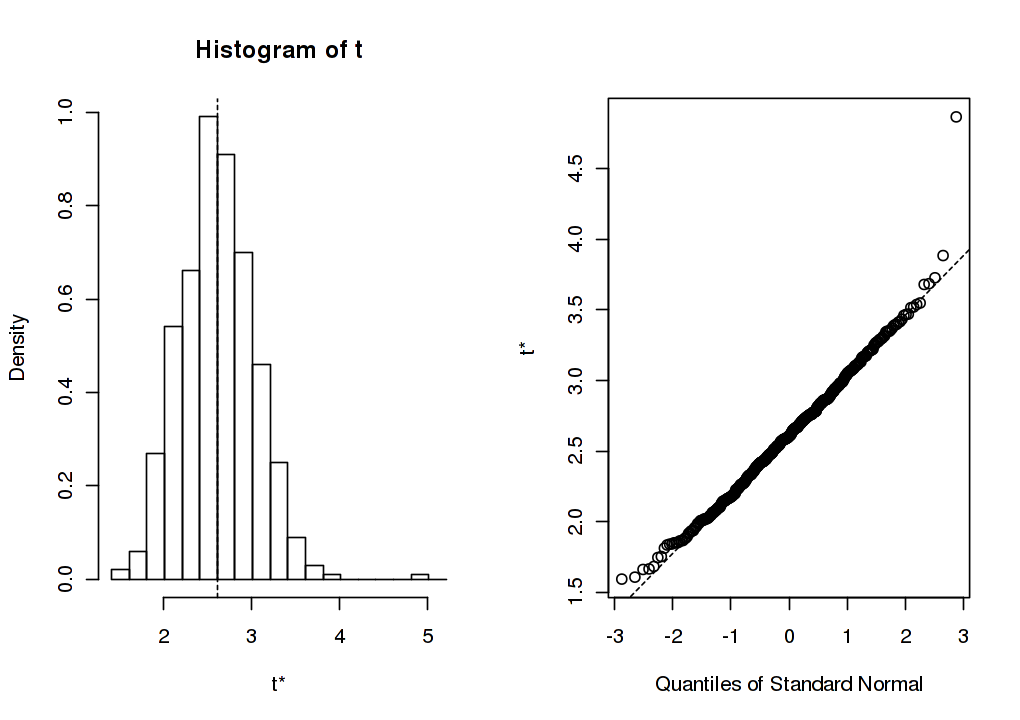

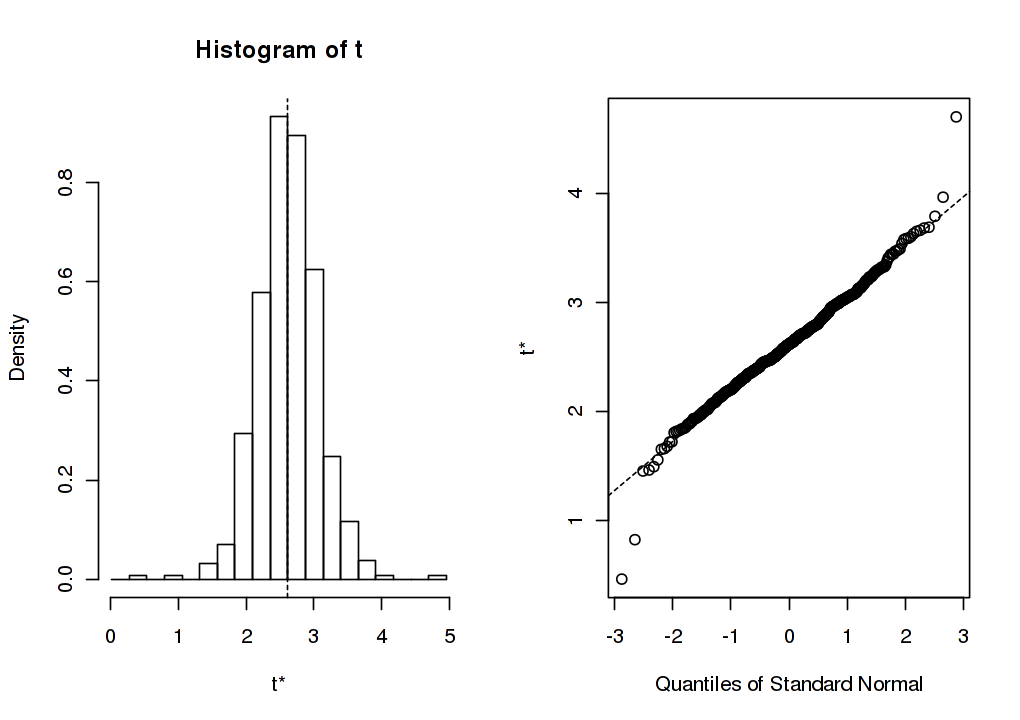

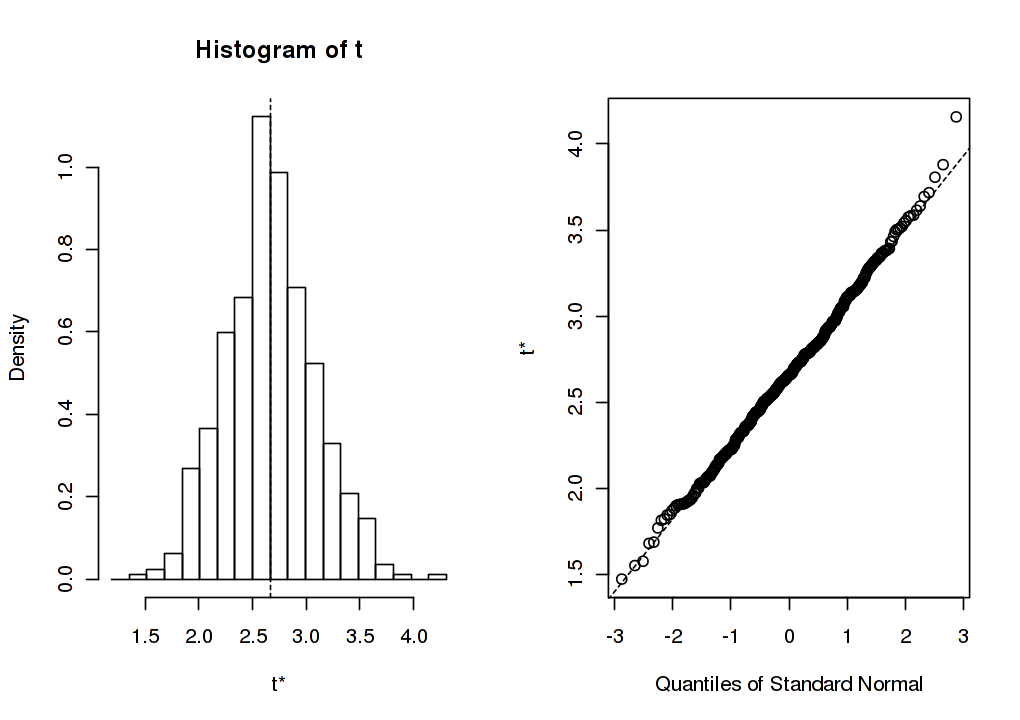

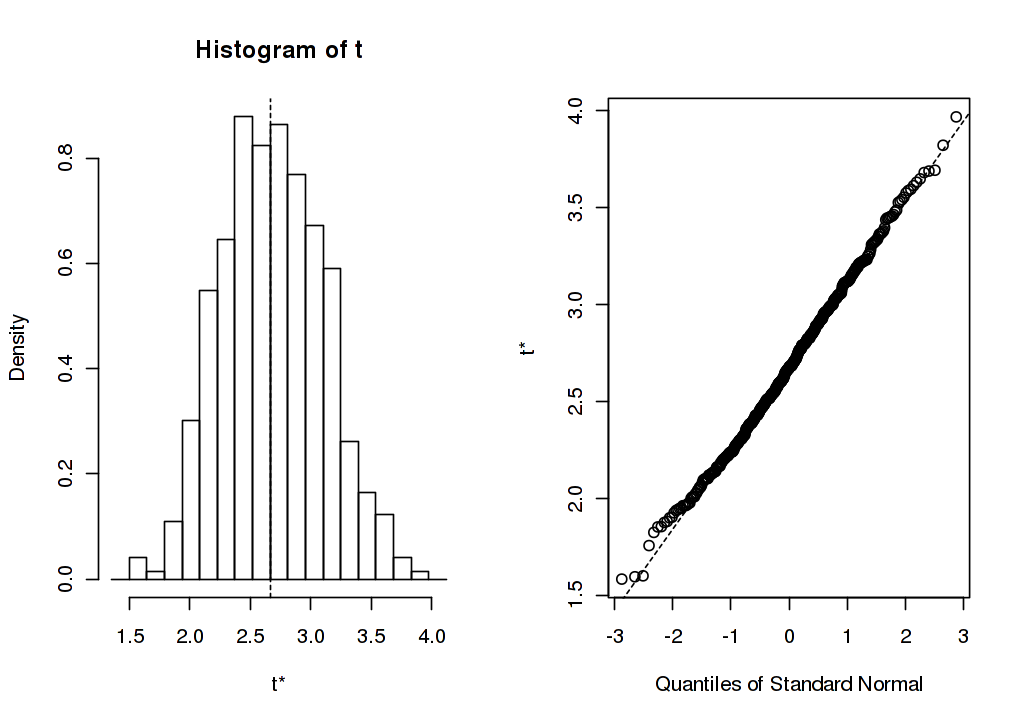

In [127]:
for(i in 1:length(responses)){
    
    
    #print(responses[i])
    plot(mymodel.boot[[i]])
    #plot(mymodel.boot.sigma[[i]])
    
    
}

In [123]:
for(i in 1:length(target_responses)){
    
    print(responses[i])
    print(mymodel.boot[[i]])
    
    
}

[1] "AverageDPOAE_LE"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mydata, statistic = funB, R = 500)


Bootstrap Statistics :
    original      bias    std. error
t1* 2.615787 0.003439495   0.4211695
[1] "AverageDPOAE_RE"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mydata, statistic = funB, R = 500)


Bootstrap Statistics :
    original      bias    std. error
t1* 2.615787 0.007486698   0.4492225
[1] "AverageY8HTL_3and4k_LE"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mydata, statistic = funB, R = 500)


Bootstrap Statistics :
    original      bias    std. error
t1*  2.66428 0.001095688   0.4213407
[1] "AverageY8HTL_3and4k_RE"

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mydata, statistic = funB, R = 500)


Bootstrap Statistics :
    original     bias    std. error
t1*  2.66428 0.01929444     0.42058


In [124]:
mymodel.ci <- list()
mymin <- NULL
mymax <- NULL
for(i in 1:length(target_responses)){
    print(responses[i])
        mymodel.ci[[i]] <- boot.ci(mymodel.boot[[i]])
        print(mymodel.ci[[i]]$bca)
    mymin[i] <- (mymodel.ci[[i]]$bca[4])
    mymax[i] <- (mymodel.ci[[i]]$bca[5])
}

[1] "AverageDPOAE_LE"


Warning message in boot.ci(mymodel.boot[[i]]):
“bootstrap variances needed for studentized intervals”

     conf                              
[1,] 0.95 13.72 489.58 1.852516 3.46433
[1] "AverageDPOAE_RE"


Warning message in boot.ci(mymodel.boot[[i]]):
“bootstrap variances needed for studentized intervals”

     conf                               
[1,] 0.95 12.13 488.07 1.806848 3.544748
[1] "AverageY8HTL_3and4k_LE"


Warning message in boot.ci(mymodel.boot[[i]]):
“bootstrap variances needed for studentized intervals”

     conf                               
[1,] 0.95 15.34 490.89 1.906787 3.572163
[1] "AverageY8HTL_3and4k_RE"


Warning message in boot.ci(mymodel.boot[[i]]):
“bootstrap variances needed for studentized intervals”

     conf                              
[1,] 0.95 11.58 487.45 1.916745 3.53719


In [109]:
cbind(mymin, mymax)


mymin,mymax
1.852516,3.464330
1.806848,3.544748
1.906787,3.572163
1.916745,3.537190


In [117]:
mycv <- list()
mytrainingMSE <- NULL
families <- list(SHASH,SHASH,ST4,ST4)
for(i in 1:length(target_responses)){
    
       
    myindex <- which(responses==target_responses[i]) 
    print(target_responses[i])
    mymodel <- gamlss_models[[myindex]]
    mytrainingMSE[i] <- mean(mymodel$residuals^2)
    
    myformula <- paste0(mymodel$mu.terms[[2]]," ~ ",as.character(mymodel$mu.terms[[3]][-1][1]), " + ",as.character(mymodel$mu.terms[[3]][-1][2]))
    
    print(myformula)
    myformula <- as.formula(myformula)
    
    mycv[[i]] <- suppressWarnings(gamlssCV(myformula, data=na.omit(mytable_variables),family=families[[i]],method=mixed(5,20), K.fold = 166,  sigma.link="identify", mu.link="identify", nu.link = "identify"))
    
}

[1] "AverageY8HTL_3and4k_LE"
[1] "AverageY8HTL_3and4k_LE ~ Gender + Ethnicity + MusicEx_total + smoking + KCNE1_1_bv + KCNE1_2_bv + KCNQ1_bv + CDH23_2_bv + GJB2_1_bv + GJB2_2_bv + GJB4_bv + KCNJ10_bv + ESRRB_bv + CAT_3_bv + CAT_5_bv + HSP70_1_bv + HSP70_2_bv + HSP70_3_bv + PCDH15_bv + MYH14_1_bv + MYH14_2_bv + GRM7_bv + PON2_bv"
fold 1
fold 4
fold 5
fold 6
fold 8
fold 9
fold 10
fold 12
fold 13
fold 14
fold 16
fold 17
fold 19
fold 20
fold 22
fold 27
fold 28
fold 31
fold 32
fold 33
fold 35
fold 37
fold 38
fold 39
fold 40
fold 42
fold 43
fold 44
fold 45
fold 46
fold 47
fold 48
fold 49
fold 50
fold 51
fold 54
fold 55
fold 56
fold 58
fold 59
fold 60
fold 61
fold 65
fold 66
fold 68
fold 69
fold 70
fold 71
fold 72
fold 74
fold 75
fold 76
fold 77
fold 78
fold 79
fold 80
fold 82
fold 86
fold 87
fold 88
fold 90
fold 91
fold 92
fold 93
fold 94
fold 96
fold 99
fold 100
fold 102
fold 103
fold 106
fold 107
fold 110
fold 114
fold 116
fold 118
fold 119
fold 120
fold 121
fold 123
fold 124
fold 125
fold

In [119]:
myMSE <- NULL
for(i in 1:length(target_responses)){
    
myMSE[i] <- mean(mycv[[i]]$residCV^2)    
    
}


In [120]:
cbind(mytrainingMSE)

mytrainingMSE
0.9893509
0.9948967
0.9974902
1.0473774


In [121]:
cbind(myMSE)

myMSE
1.0795759
0.9089987
0.7724887
0.8083669
